# Vanishing Gradients
- Adding layers to a neural network introduces multiplicative effects in both forward and backward propagation
- The back prop in particular presents a problem as the gradient of activation functions can be very small
- Multiplied together across many layers, their product can be vanishingly small
- This results in weights not being updated in the front layers and training not progressing


- Gradients of the sigmoid function, range [0, 0.25] - Gradient is calculated for the front layers of a neural network using chain rule
- The tiny values are multiplied starting at the last layer - working backwards to the first layer, with the gradients shrinking exponentially at each step

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

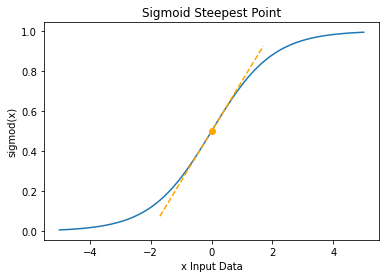

In [4]:
x = np.linspace(-5, 5, 100)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

activations = sigmoid(x)

def sigmoid_gradient(x):
    return (x) * (1 - x)

gradients = sigmoid_gradient(activations)

# Plot sigmoid with tangent line
plt.plot(x, activations)
plt.title('Sigmoid Steepest Point')
plt.xlabel('x Input Data')
plt.ylabel('sigmod(x)')

# x value to find the tangent. 
x_tan = 0
y_tan = sigmoid(x_tan)
span = 1.7
data_tan = np.linspace(x_tan - span, x_tan + span)
gradient_tan = sigmoid_gradient(sigmoid(x_tan))
tan = y_tan + gradient_tan * (data_tan - x_tan)
plt.plot(x_tan, y_tan, marker='o', color='orange', label=True)
plt.plot(data_tan, tan, linestyle='--', color='orange')
plt.show()

<ipython-input-5-34e22ef9a99e>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


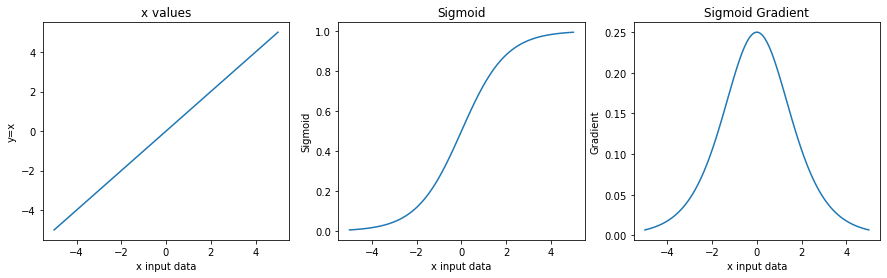

In [5]:
# Sub Plots
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# X values
axs[0].plot(x, x)
axs[0].set_title("x values")
axs[0].set_ylabel("y=x")
axs[0].set_xlabel("x input data")

# Sigmoid
axs[1].plot(x, activations)
axs[1].set_title("Sigmoid")
axs[1].set_ylabel("Sigmoid")
axs[1].set_xlabel("x input data")

# Sigmoid Gradient
axs[2].plot(x, gradients)
axs[2].set_title("Sigmoid Gradient")
axs[2].set_ylabel("Gradient")
axs[2].set_xlabel("x input data")

fig.show()

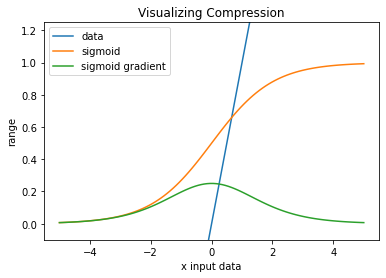

In [10]:
# Single plot
plt.plot(x, x, label="data")
plt.plot(x, activations, label="sigmoid")
plt.plot(x, gradients, label="sigmoid gradient")
plt.legend(loc="upper left")
plt.title("Visualizing Compression")
plt.xlabel("x input data")
plt.ylabel("range")

plt.ylim(-.1, 1.25)    # try shrinking the y axis limit for better visualization. eg: uncomment this line
plt.show()

In [11]:
# Max, Min of each array
print("")
print("Max of x data :", np.max(x))
print("Min of x data :", np.min(x), "\n")
print("Max of sigmoid :", "{:.3f}".format(np.max(activations)))
print("Min of sigmoid :", "{:.3f}".format(np.min(activations)), "\n")
print("Max of gradients :", "{:.3f}".format(np.max(gradients)))
print("Min of gradients :", "{:.3f}".format(np.min(gradients)))


Max of x data : 5.0
Min of x data : -5.0 

Max of sigmoid : 0.993
Min of sigmoid : 0.007 

Max of gradients : 0.250
Min of gradients : 0.007


### Numerical Impact
#### Multiplication & Decay
- Multiplying numbers smaller than 1 results in smaller and smaller numbers
- Find gradient for an input x = 0 and multiplies it over n steps
- Observe the speed at which it `vanishes` to almost zero
- Yet sigmoid(x=0)=0.5 which has a sigmoid gradient of 0.25 and that happens to be the largest sigmod gradient possible

-- Input --
steps : 6
x value : 0
sigmoid : 0.50000
gradient : 0.25000 

-- Loop --
Step 1: 0.25
Step 2: 0.0625
Step 3: 0.015625
Step 4: 0.00390625
Step 5: 0.0009765625
Step 6: 0.000244140625



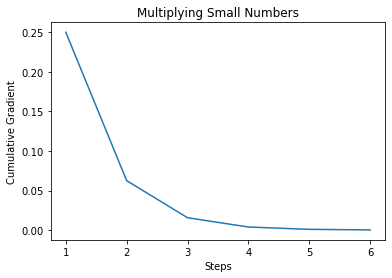

In [13]:
n = 6
x = 0
grad = sigmoid_gradient(sigmoid(x))
steps = np.arange(1, n+1)

print("-- Input --")
print("steps :", n)
print("x value :", x)
print("sigmoid :", "{:.5f}".format(sigmoid(x)))
print("gradient :", "{:.5f}".format(grad), "\n")

# Loop to calculate cumulative total
print("-- Loop --")
vals = []
total_grad = 1
for s in steps:
    total_grad = total_grad * grad
    vals.append(total_grad)
    print(f'Step {s}: {total_grad}')
    
print("")

plt.plot(steps, vals)
plt.xticks(steps)
plt.title("Multiplying Small Numbers")
plt.xlabel("Steps")
plt.ylabel("Cumulative Gradient")
plt.show()